# Probability and Simulation

This activity's learning goals are to have you practice...

    1. Designing experiments to test hypotheses
    2. Using the rules of probability to model phenomena
    3. Implementing probabilistic models in Python
    4. Using basic statistical techniques to analyze experimental results

To start, let's familiarize ourselves with making generative probabilistic models using scipy stats. For full details for this code, you should reference the [official documentation](https://docs.scipy.org/doc/scipy/reference/stats.html) (they're so useful, in fact, I have the docs open while I'm writing this assignment!). 

Suppose I want to simulate a coin flip. We can do that by first identifying that a coin flip can be described as a [Bernoulli trial](https://en.wikipedia.org/wiki/Bernoulli_trial), a trial where either the set of outcomes $\Omega$ is has only two options: one with probability $p$ and another with probability $1-p$. Scipy stats represents that distribution as a `bernoulli` object, from which you can sample with a given $p$ by using the `rvs` (i.e., random variable(s)) function.

In [21]:
from scipy import stats

print(stats.bernoulli.rvs(p=0.5)) # A single flip

print(stats.bernoulli.rvs(p=0.5, size=10)) # Flip the coin 10 times

0
[0 1 0 1 0 1 1 0 1 0]


Since this is a bernoulli trial and not a coin flip, the code outputs a 1 or a 0 rather than heads or tails. For our purposes, translating back to Hs and Ts is fairly straightforward, and it might actually be beneficial to keep everything in a numeric format (for, say, counting the number of heads). 

For now, let's assume 1 = H and 2 = T. Then we can write a coin_flip function like this:

In [23]:
def coin_flip() -> int:
    return stats.bernoulli.rvs(p=0.5)

In [29]:
print(coin_flip())

0


We could also do this in a less fancy way using pythons built-in randomization functions (but that doesn't let me sneak references to probability terminology, so it's less fun). *But*, it's worth seeing anyway, especially since this extends to more complex scenarios, like dice!

In [60]:
import random

print(random.choice([0,1])) # A coin flip! Choice assume equal weights
print(random.choices([0,1], weights=[0.5, 0.5])) # the same, but we specify the weights/probabilities of each option. Note that we get a list!
print(random.choices([0,1], weights=[0.5, 0.5], k=10)) # we get a list because it's meant to sample multiple times, like rvs!

# This extends to sampling from more complex discrete distributions over finite spaces!
# Here, a 6-sided die/d6
print(random.choice([1,2,3,4,5,6]))
print(random.choices([1,2,3,4,5,6], weights=[1/6]*6))

# You can also do this in scipy stats, but it's less fun
X = stats.rv_discrete(values=([1,2,3,4,5,6],
                              [1/6]*6))
print(X.rvs())

1
[0]
[1, 1, 1, 0, 0, 1, 1, 0, 1, 0]
5
[5]
2


But, back to the coin flips.

As simple as this is, we have built a generative model of a single coin flip! We can, at will, simulate a coin flip as many times as we want!

To get ourselves warmed up, complete the code block below to test whether scipy's stats functions are reasonable: simulate a lot of coin flips and see if the coin is in fact fair! Note that the code will give an error until it's completed.

(Note: Now would it be more efficient to use the size parameter of `bernoulli`? yes. But it makes the relationship between the model and the evaluation a little messier! Bear with me!).

ZeroDivisionError: division by zero

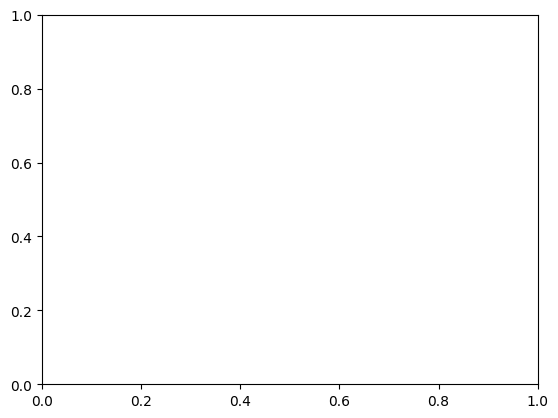

In [41]:
import matplotlib.pyplot as plt
flips = []

# TODO: fill flips with a bunch of samples from the coin_flip function

# plot the results
fig, ax = plt.subplots()
ax.bar(["H", "T"], 
       [sum(flips)/len(flips), 1 - (sum(flips)/len(flips))])
plt.show()


This also let's us reverse engineer what the probability distribution we started with was, with a little noise due to the randomness. This is referred to as a **Monte Carlo method**: For complex situations, it's sometimes easier to model the generative process and sample from it a lot of times to estimate a probability (here, the probabilities of a heads vs a tails) than to work out the probabilities by hand. This is probably not true for a coin flip, but might be true in another scenario.

## Monty Hall
Consider the **Monty Hall Problem**. A game show host presents the contestant with three doors. Behind each of them is a prize: 2 of them are not-so-great (cannonically these are goats!), and one is the most financially desirable (a new car!). The contestant then picks a door. Here the odds are unequivocally 1 in 3 to get the car (hopefully!). However, *before you see what's behind the door you chose*, the host (Monty Hall) will open a door you didn't pick to reveal a goat. He then gives you the opportunity to swap to the other unopened door. Should you swap?

This problem is intuitively very tricky --- it's said that Paul Erdős, a famous mathematician, was convinced of the wrong answer until he was shown a computer simulation!. Apocryphal or not, discuss the problem, share your intuitions, and attempt a simulation! 

1. Write functions `MontyHallSwap` and `MontyHallStay` that simulate the two strategies. Return 1 if they win (get a car) and 0 if they don't (i.e., get a goat). 
2. Simulate the strategies `n` times
3. Plot the results, adjusting the plotting code from above. Plot the odds of winning the car in each circumstance.

In [73]:
n = 1000 # Number of trials to simulate. Feel free to adjust!

def MontyHallSwap() -> int:
    # TODO
    pass
    
def MontyHallStay() -> int:
    # TODO
    pass

# TODO: simulate n trials for each strategy

# TODO: Plot the odds of winning in each case.

What is the result? Are your intuitions (or what you've been told) right? 

The key tool here is using simulation as a way to estimate a probability (or check your work if you've already computed the probability analytically!). You can extend this to other situations where things might be tricky/annoying/intractable to compute by hand (or if you've forgotten some rules of probability...:

**Bonus Qs: DO NOT ATTEMPT UNTIL COMPLETING ALL OTHER PARTS**

1. Suppose you roll 2 fair 20-sided dice and take the greater value. What are the odds you roll any particular value? Estimate the values and plot a histogram.
2. Suppose you roll a fair 6-sided die, and if it rolled a 6, you repeated the process until you didn't roll a 6. Let our random variable represent the sum of all of the dice rolled. Estimate the probability of rolling any particular number and plot a histogram.

## Likelihoods and plausibility

Suppose you flip a coin 10 times and get the following sequence: H H H H T H H H H H. What are the odds the coin is fair?

One way of figuring that out is by determining the likelihood of the event under our (hypothetical!) fair coin model. If the coin were fair, what are the odds that our model would have generated it. We can write this likelihood out mathematically as a conditional probability: $p(\text{sequence} \mid \text{fair coin})$. This is to be read as "The probability our sequence is generated assuming the coin is fair". More fancily, we can think of this as "the likelihood of this sequence being generated by a fair coin". 

Using the sampling approach and our coin-flipping model from above, estimate the likelihood of the above sequence of heads in a row appearing. You may have to use a fairly large number of samples to get a good estimate!

In [82]:
import numpy as np

seq_1 = [1, 1, 1, 1, 0, 1, 1, 1, 1, 1]

# TODO: Simulate a large number of fair 10-coin-flip sequences

# TODO: Estimate the likelihood of seq_1 

0.000986


A low likelihood would indicate that the coin isn't quite fair! But, for a sanity check, use your code to estimate the likelihood of these other sequences that seem more reasonable! In fact, to guarantee that our fair comparison was generated by a random process, lets generate `seq_3` using our simulator!

In [83]:
seq_2 = [0, 1, 1, 0, 0, 1, 1, 0, 1, 0]
seq_3 = [coin_flip() for _ in range(10)] 

# TODO: Estimate the likelihoods of each sequence


Lo and behold, if all worked out, all their likelihoods should be roughly the same (roughly $\frac{1}{2^{10}}$!). 

It turns out this exact sequence is as reasonable as any other. However, lets narrow in on what's weird about this experimental outcome: the number of heads that we flipped. 

Redo your simulation, but this time count the **number** of heads in each trial. What are the odds that we flip 9 heads in 10 trials? Compare that to the likelihood of 5 as in seq_2.

In [86]:
# TODO: Estimate the likelihood of 9 heads being flipped.


0.009661
0.246138


They should be much different! 

Now lets make one adjustment so I can create a self-described clever teaching moment: What are the odds that we would get this sequence, or something *more extreme* given that the coin were fair. i.e., adjust your code so you compute the likelihood that you get a 9 *or greater* assuming your coin was fair.

In [89]:
# TODO: Estimate the likelihood of 9+ heads being flipped.


0.01058


This is, formally, $p(\geq 9\text{ heads} \mid \text{fair coin})$. Now lets let, say, $T$ represent the heads count of 10 coin flips, let $t=9$ be the observed number of heads in our data, and lets refer to the coin being fair as the *null hypothesis* $H_0$. 

Then what we have just done is estimate $p(T \geq t \mid H_0)$ something we call a *p-value*: the likelihood that we observe something as or more extreme than our data given that we assume the null hypothesis (i.e., nothing of interest is happening). In many empirical domains, the p-value is used for statistical significance testing: if our $p$ is lower than some threshold (called $\alpha$, typically $0.05$), we *reject the null hypothesis* and presume something more interesting is going on! 

Here, that means that if the likelihood you computed is under $0.05$ (hopefully it is, or your estimate is a bit off!), we can reject the  (null) hypothesis that the coin is fair, and under typical scientific practice assume it's rigged!

Out of care for the mental health of statisticians in the department, I must, however, inform you that this likelihood is NOT the probability that the coin is fair given the data! Take a moment to convince yourself that that's true (write out the conditional probability representing that!) and, as a **bonus**, describe the relationship between the two using the analytical tools from the reading.

Also note: While you might do some hypothesis testing in this course (perhaps in a course project, or maybe using a more conventional method that [scipy stats provides](https://docs.scipy.org/doc/scipy/reference/stats.html#hypothesis-tests-and-related-functions)), for this course, we'll often be using the likelihood of data under a model (namely, the likelihood of a corpus given a particular language model) as a measure of a model's quality. 